In [99]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [100]:
ccfrp_dates = ['20250627', '20250702', '20250703']

In [101]:
# Thinking about fish morphology (rockfish have same total length as fork length)

In [108]:



def rock_fish_adjustment(df):
    """
    Adjusts the GT Total Length for rockfish species by setting it equal to GT Fork Length.
    """
    rockfish_species = ['Black Rockfish', 'Blue Rockfish', 'China Rockfish', 'Copper Rockfish', 'Deacon Rockfish',
                        'Gopher Rockfish', 'Grass Rockfish', 'Olive Rockfish', 'Quillback Rockfish',
                        'Redbanded Rockfish', 'Rosy Rockfish', 'Tiger Rockfish', 'Brown Rockfish', 'Longfin Sanddab']
    
    for row in df.itertuples():
        if row._4 in rockfish_species:
            if str(row._6) == 'nan':
                df.at[row.Index, 'GT Total Length'] = row._5  # Set GT Total Length equal to GT Fork Length
            elif str(row._5) == 'nan':
                df.at[row.Index, 'GT Fork Length'] = row._6  # Set GT Fork Length equal to GT Total Length
            else:
                continue
        
    return df

In [109]:
ccfrp_dfs = []
for date in ccfrp_dates:
    df = pd.read_csv(f'/Users/anu/Documents/e4e/2025-07-21_fishsense-mobile-data-processing/data/fishsense_output - {date}.csv')
    df['date'] = date
    ccfrp_dfs.append(df)

ccfrp_results = pd.concat(ccfrp_dfs)
ccfrp_results = rock_fish_adjustment(ccfrp_results)

lab_results = pd.read_csv('/Users/anu/Documents/e4e/2025-07-21_fishsense-mobile-data-processing/data/fishsense_output - 20250701.csv')

In [138]:
lab_results

,TagID,Common Name,GT Fork Length,FT Total Length,FSM Phone,FSM Ipad,FT Phone,FT Ipad
0,30279,Gopher Rockfish,250,250,270,275,244.0,257.0
1,30279,Gopher Rockfish,250,250,252,270,253.0,256.0
2,30279,Gopher Rockfish,250,250,257,268,248.0,256.0
3,30279,Gopher Rockfish,250,250,259,271,246.0,253.0
4,30279,Gopher Rockfish,250,250,242,267,249.0,252.0
...,...,...,...,...,...,...,...,...
126,30284,Vermilion,275,277,277,241,NaN,NaN
127,30284,Vermilion,275,277,275,268,NaN,NaN
128,30284,Vermilion,275,277,283,262,NaN,NaN
129,30284,Vermilion,275,277,278,283,NaN,NaN


<Axes: xlabel='diff', ylabel='Count'>

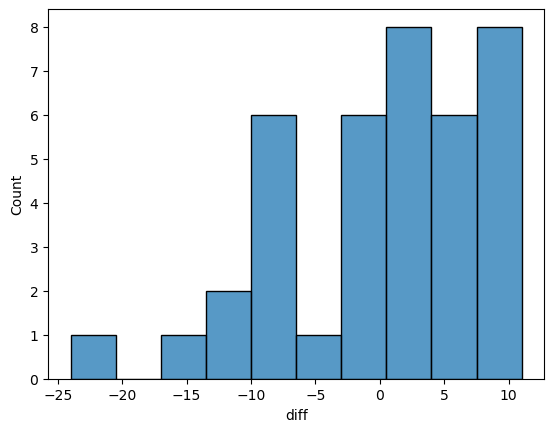

In [146]:
# lab results plotting
lab_results['diff'] = lab_results['FT Total Length'] - lab_results['FT Phone']

sns.histplot(data=lab_results, x='diff', bins = 10, label='GT Total Length')

In [129]:
# fishtechy results (removing outliers in the plot)
fishtechy_df = ccfrp_results.copy().reset_index()

fishtechy_df['diff'] = fishtechy_df['GT Total Length'] - fishtechy_df['FishTechy']



<Axes: xlabel='GT Total Length', ylabel='Count'>

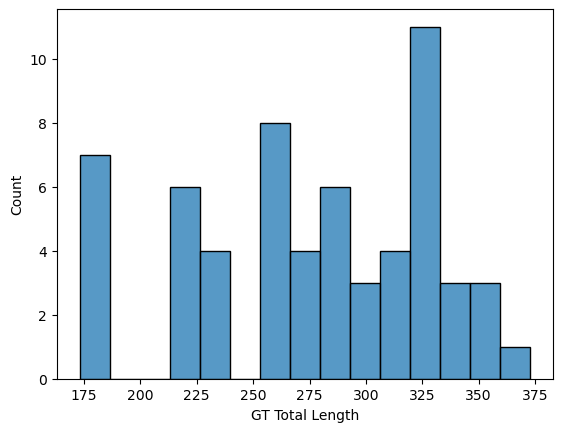

In [134]:
sns.histplot(data=fishtechy_df, x='GT Total Length', bins = 15, label='GT Total Length')

In [ ]:
# lab results